# Project 4: Predictive Analysis using scikit-learn.

# DAV-5400

# Jordan Armstrong, Mark Kaplan, Yitzhar Shalom


# Phase 1: Data Acquisition, Data Preparation & Exploratory Data Analysis

## Introduction and Data Loading

The goal of this project is to prepare data for predictive analysis and then construct a predictive model. The data set we will be using is the [UCI Machine learning Repository Mushroom Data Set](https://archive.ics.uci.edu/ml/datasets/mushroom).

The data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

The research question we will be pursuing is: Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of whether a particular mushroom is poisonous or edible?

We import the data and check the shape, head, and tail to confirm the data was loaded properly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

read = pd.read_csv("https://raw.githubusercontent.com/mark-kaplan-0/DAV-5400-data/main/agaricus-lepiota.data", header=None)

read.head(4)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [3]:
read.tail(4)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [4]:
read.shape

(8124, 23)

## Data Processing

We convert the data into a workable format. In addition to edible or poisonous and odor, we chose to use Spore Print Color (index number 20) and gill color (index number 9). Then we replace the titles of the columns, and convert "e" and "p" (edible and poisonous) indicators to digits, (1 and 0 respectively). We also check for any null data.

In [2]:
df = read.iloc[:, [0,5,20,9]].copy()
df.head()

,0,5,20,9
0,p,p,k,k
1,e,a,n,k
2,e,l,n,n
3,p,p,k,n
4,e,n,n,k


In [3]:
df.columns = ['Edible','Odor','Spore_Color','Gill_Color']
df.head()

,Edible,Odor,Spore_Color,Gill_Color
0,p,p,k,k
1,e,a,n,k
2,e,l,n,n
3,p,p,k,n
4,e,n,n,k


In [4]:
df.Edible.replace('e', 1, inplace=True)
df.Edible.replace('p', 0, inplace=True)
df.head(5)

,Edible,Odor,Spore_Color,Gill_Color
0,0,p,k,k
1,1,a,n,k
2,1,l,n,n
3,0,p,k,n
4,1,n,n,k


In [8]:
df.isnull().sum()

Edible         0
Odor           0
Spore_Color    0
Gill_Color     0
dtype: int64

We now create a set of dummy variables for each column in the dataframe using the pd.get_dummies method.

In [5]:
df1= pd.get_dummies(df, columns=['Odor', 'Spore_Color', 'Gill_Color'])
df1.head()

,Edible,Odor_a,Odor_c,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Odor_s,Odor_y,...,Gill_Color_g,Gill_Color_h,Gill_Color_k,Gill_Color_n,Gill_Color_o,Gill_Color_p,Gill_Color_r,Gill_Color_u,Gill_Color_w,Gill_Color_y
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Odor

We create a chart showing the relationship between odor and poisonous/edible.

In [11]:
grouped = df1.groupby(['Edible']).sum()
grouped_odor = grouped.iloc[:,0:9]

odor = grouped_odor.rename(columns={'Odor_a':'almond', 'Odor_c':'creosote', 
                                 'Odor_f':'foul', 'Odor_l':'anise', 'Odor_m':'musty', 
                                 'Odor_n':'none', 'Odor_p':'pungent','Odor_s':'spicy', 
                                 'Odor_y':'fishy'}, index={0:'poisonous', 1:'edible'})


#append sum of columns as a total row
odor_total = odor.append(pd.Series(odor.sum(),name='Total'))
edible_percent = odor_total.iloc[1].values/odor_total.iloc[2] * 100
odor_total = odor_total.append(pd.Series(edible_percent, name = 'Percent Edible'))
odor_total

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
Edible,,,,,,,,,
poisonous,0.0,192.0,2160.0,0.0,36.0,120.000000,256.0,576.0,576.0
edible,400.0,0.0,0.0,400.0,0.0,3408.000000,0.0,0.0,0.0
Total,400.0,192.0,2160.0,400.0,36.0,3528.000000,256.0,576.0,576.0
Percent Edible,100.0,0.0,0.0,100.0,0.0,96.598639,0.0,0.0,0.0


As shown, all almond and anise odors are edible, and about 97% of odorless mushrooms are edible. All creosote, foul,  musty, pungent, spicy, and fishy odors are poisonous. We now show the distribution of the odor variable.

In [12]:
row = pd.DataFrame(odor_total.iloc[2])
row1 = row.sort_values(by=['Total'], ascending=False)

%matplotlib notebook

<AxesSubplot:ylabel='Total'>

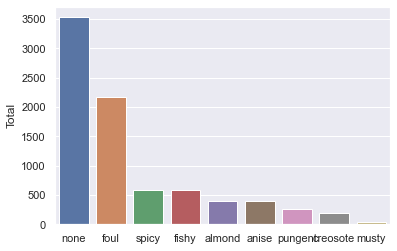

In [13]:
sns.set_theme(style="darkgrid")
display(sns.barplot(x = row1.index, y='Total', data=row1))

## Spore Color

Similarly, a graph is generated to reflect the relationship between spore color and edibility. 

In [14]:
grouped_color = grouped.iloc[:,9:18]

spore_color = grouped_color.rename(columns={'Spore_Color_b':'buff', 'Spore_Color_h':'chocolate', 
                                 'Spore_Color_k':'black', 'Spore_Color_n':'brown', 'Spore_Color_o':'orange', 
                                 'Spore_Color_r':'green', 'Spore_Color_u':'purple','Spore_Color_w':'white', 
                                 'Spore_Color_y':'yellow'}, index={0:'poisonous', 1:'edible'})


#append sum of columns as a total row
sp_color_total = spore_color.append(pd.Series(spore_color.sum(),name='Total'))
edible_percent1 = sp_color_total.iloc[1].values/sp_color_total.iloc[2] * 100
sp_color_total = sp_color_total.append(pd.Series(edible_percent1, name = 'Percent Edible'))
sp_color_total

,buff,chocolate,black,brown,orange,green,purple,white,yellow
Edible,,,,,,,,,
poisonous,0.0,1584.000000,224.000000,224.000000,0.0,72.0,0.0,1812.000000,0.0
edible,48.0,48.000000,1648.000000,1744.000000,48.0,0.0,48.0,576.000000,48.0
Total,48.0,1632.000000,1872.000000,1968.000000,48.0,72.0,48.0,2388.000000,48.0
Percent Edible,100.0,2.941176,88.034188,88.617886,100.0,0.0,100.0,24.120603,100.0


Our analysis shows that all mushrooms with buff, orange, and purple colored spores are edible, all green-spored mushrooms are poisonous, and varying percents of other colors are edible. The distribution of spore colors is then shown.

<AxesSubplot:ylabel='Total'>

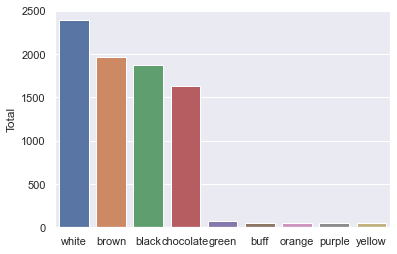

In [15]:
row2 = pd.DataFrame(sp_color_total.iloc[2])
row3 = row2.sort_values(by=['Total'], ascending=False)
sns.set_theme(style="darkgrid")
display(sns.barplot(x = row3.index, y='Total', data=row3))

## Gill Color

Likewise, a relationship between gill color and edibility:

In [16]:
grouped_gill_color = grouped.iloc[:,18:33]

gill_color = grouped_gill_color.rename(columns={'Gill_Color_b':'buff', 'Gill_Color_e':'red', 'Gill_Color_g':'gray',
                                 'Gill_Color_h':'chocolate', 'Gill_Color_k':'black', 'Gill_Color_n':'brown', 
                                 'Gill_Color_o':'orange', 'Gill_Color_p':'pink',
                                 'Gill_Color_r':'green', 'Gill_Color_u':'purple','Gill_Color_w':'white', 
                                 'Gill_Color_y':'yellow'}, index={0:'poisonous', 1:'edible'})


#append sum of columns as a total row
gill_color_total = gill_color.append(pd.Series(gill_color.sum(),name='Total'))
edible_percent2 = gill_color_total.iloc[1].values/gill_color_total.iloc[2] * 100
gill_color_total = gill_color_total.append(pd.Series(edible_percent2, name = 'Percent Edible'))
gill_color_total

,buff,red,gray,chocolate,black,brown,orange,pink,green,purple,white,yellow
Edible,,,,,,,,,,,,
poisonous,1728.0,0.0,504.000000,528.000000,64.000000,112.000000,0.0,640.000000,24.0,48.000000,246.00000,22.000000
edible,0.0,96.0,248.000000,204.000000,344.000000,936.000000,64.0,852.000000,0.0,444.000000,956.00000,64.000000
Total,1728.0,96.0,752.000000,732.000000,408.000000,1048.000000,64.0,1492.000000,24.0,492.000000,1202.00000,86.000000
Percent Edible,0.0,100.0,32.978723,27.868852,84.313725,89.312977,100.0,57.104558,0.0,90.243902,79.53411,74.418605


Our calculations show that mushrooms with red and orange gills were always reported to be edible, while buff and green colored gills were always indicative of a poisonous mushroom. Displaying the distribution of gill color is then shown.

<AxesSubplot:ylabel='Total'>

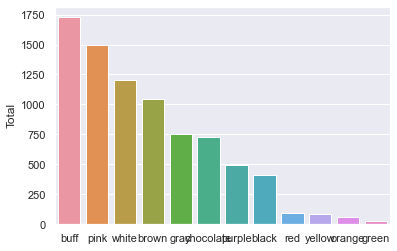

In [17]:
row4 = pd.DataFrame(gill_color_total.iloc[2])
row5 = row4.sort_values(by=['Total'], ascending=False)
sns.set_theme(style="darkgrid")
display(sns.barplot(x = row5.index, y='Total', data=row5))

# Phase 2: Predictive Modeling

The scikit-learn library can be used to quantify which of the observed parameter is the most effective indicator of mushroom edibility. The strategy is to find a linear reqression for each of the three relationships and compare them. We identify the variables, and split the data into 75 and 25 percent, so that the model fits itself onto 75% and then tests on the remaining 25%. 

### Odor Predictive Model
First we build a predictive model determining how odor predicts mushroom edibility.

In [18]:
#source: towardatascience.com
#identifying variables
y = df1.Edible.copy()
X = df1.iloc[: , 1:10]

#splitting data into 25% to be used for test, and 75% to be used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
model = LogisticRegression()
model.fit(X_train, y_train)

#we fit a logistic regression model...
model = LogisticRegression()
model.fit(X_train, y_train)

#...and apply it to the data to predict edibility
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['Edible', 'Prediction']
z

,Edible,Prediction
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
2026,0,0
2027,0,0
2028,1,1
2029,1,1


The result is a boolean table demonstrating the mushrooms that were acutally poisonous/edible versus those predicted to be by the fitted regression model. We can then quantify the effetiveness of our model by importing 'metrics':

In [19]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9807976366322009
Precision: 0.9648014440433214
Recall: 1.0


The accuracy of our model is 98% ...

### Spore Color Predictive Model
Next we build a predictive model for Spore Color on mushroom edibility.

In [20]:
#source: towardatascience.com
#identifying variables
y = df1.Edible.copy()
X = df1.iloc[: , 10:19]

#splitting data into 25% to be used for test, and 75% to be used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
model = LogisticRegression()
model.fit(X_train, y_train)

#we fit a logistic regression model...
model = LogisticRegression()
model.fit(X_train, y_train)

#...and apply it to the data to predict edibility
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['Edible', 'Prediction']
z

,Edible,Prediction
0,1,1
1,1,1
2,1,0
3,0,0
4,1,1
...,...,...
2026,0,0
2027,0,0
2028,1,1
2029,1,0


In [21]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8645987198424422
Precision: 0.897
Recall: 0.8391019644527596


### Gill Color Predictive Model
Next we build a predictive model for Gill Color on mushroom edibility.

In [30]:
#source: towardatascience.com
#identifying variables
y = df1.Edible.copy()
X = df1.iloc[: , 19:32]

#splitting data into 25% to be used for test, and 75% to be used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
model = LogisticRegression()
model.fit(X_train, y_train)

#we fit a logistic regression model...
model = LogisticRegression()
model.fit(X_train, y_train)

#...and apply it to the data to predict edibility
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['Edible', 'Prediction']
z

,Edible,Prediction
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
2026,0,0
2027,0,0
2028,1,1
2029,1,0


In [31]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8025603151157066
Precision: 0.7728758169934641
Recall: 0.8849391955098223


# Conclusion
We see that Odor was the best predictor (98% accurate), followed by Spore Color (86% accurate), and the worst, while still fairly accurate predictor was Gill Color (80% accurate). This matches what we assumed based on our exploratory data analysis, as the predictors with the least variability resulted in the most effective model. 

Our recommendation for further analysis would be to examine the other variables. Another recommendation would be to explore within the odorless category of the Odor predictor. It would be interesting to see that within this subset, how other predictors would effect the edibility. 